# **BEER RECOMMENDATION SYSTEM**

A recommender system allows you to provide personalized recommendations to users. With this beer recommendation system, model can make recommendations to users.

The dataset is taken from the below link : https://www.kaggle.com/sachinkun21/beer-datacsv

In [ ]:
# Importing Libraries       
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading Dataset
beer_data = pd.read_csv("beer_data.csv")

In [ ]:
#Shape of the data
beer_data.shape

(475984, 3)

In [ ]:
#Checking first few rows of the data
beer_data.head(10)

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5
5,58046,mikedrinksbeer2,4.5
6,58046,dbmernin83,4.0
7,58046,Blakaeris,4.5
8,58046,bashiba,4.5
9,58046,oberon,4.0


In [ ]:
beer_data.describe()

,beer_beerid,review_overall
count,475984.000000,475984.000000
mean,21660.550611,3.814827
std,21793.437326,0.720411
min,3.000000,0.000000
25%,1716.000000,3.500000
50%,13892.000000,4.000000
75%,39397.000000,4.500000
max,77317.000000,5.000000


**The average rating for these beers is 3.81**

In [ ]:
#Checking count of ratings for each rating given
beer_data.review_overall.value_counts()

4.0    174804
4.5     97349
3.5     90804
3.0     49523
5.0     27176
2.5     17601
2.0     11615
1.5      3817
1.0      3289
0.0         6
Name: review_overall, dtype: int64

**Handling Null Data**

In [ ]:
#Checking the review_profilename null rows
beer_data.loc[beer_data.review_profilename.isnull()].count()

beer_beerid           100
review_profilename      0
review_overall        100
dtype: int64

In [ ]:
#since very small no. of rows for null values so removing those
beer_data = beer_data[~beer_data.review_profilename.isnull()]

**Handling Duplicate Data values**

In [ ]:
#Checking duplicate values
beer_data.duplicated().sum()

580

In [ ]:
#Dropping duplicate values
beer_data.drop_duplicates(keep = 'first', inplace = True)

**Analysing number of beers with number of ratings of given**

In [ ]:
reviews_count_beer_id = beer_data.groupby('beer_beerid').review_overall.count().to_frame('Reviews_count').sort_values(by = "Reviews_count", ascending=False)

In [ ]:
# Count of Ratings for specific beer id
reviews_count_beer_id.head(3)

,Reviews_count
beer_beerid,
2093,980
412,972
1904,903


In [ ]:
reviews_count_beer_id.reset_index(inplace=True)

In [ ]:
reviews_count_analyze = reviews_count_beer_id.Reviews_count.value_counts().to_frame().reset_index()

In [ ]:
reviews_count_analyze.columns = ['number_of_reviews','number_of_beers']

In [ ]:
# Number of ratings for Number of beers
reviews_count_analyze.head(10)

,number_of_reviews,number_of_beers
0,1,18066
1,2,6188
2,3,3072
3,4,1906
4,5,1344
5,6,963
6,7,785
7,8,560
8,9,474
9,10,406


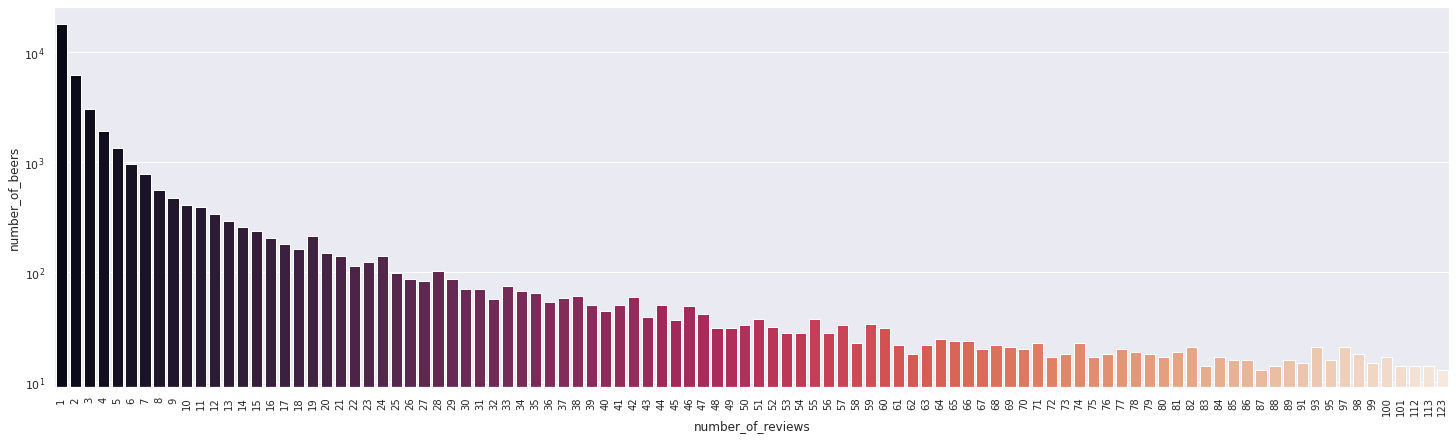

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(25,7)})
ax = sns.barplot(x=reviews_count_analyze[0:100].number_of_reviews, y=reviews_count_analyze[0:200].number_of_beers, palette="rocket")
ax.set(yscale="log")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,fontsize=10)
ax

There are very few number of beers with more number of ratings.

**Analysing number of users with number of reviews they have given**

In [ ]:
reviews_count_by_profilename = beer_data.groupby('review_profilename').review_overall.count().to_frame('count_reviews').sort_values(by = "count_reviews", ascending = False)

In [ ]:
reviews_count_by_profilename.reset_index(inplace=True)

In [ ]:
reviews_count_by_profilename.head()

,review_profilename,count_reviews
0,northyorksammy,1844
1,mikesgroove,1377
2,BuckeyeNation,1337
3,Thorpe429,1072
4,ChainGangGuy,1046


In [ ]:
#now lets explore number of users with number of reviews they have given
reviews_count_user = reviews_count_by_profilename.count_reviews.value_counts().to_frame().reset_index()

In [ ]:
reviews_count_user.columns = ['number_of_reviews','number_of_users']

In [ ]:
reviews_count_user.head()

,number_of_reviews,number_of_users
0,1,7976
1,2,2948
2,3,1621
3,4,1108
4,5,841


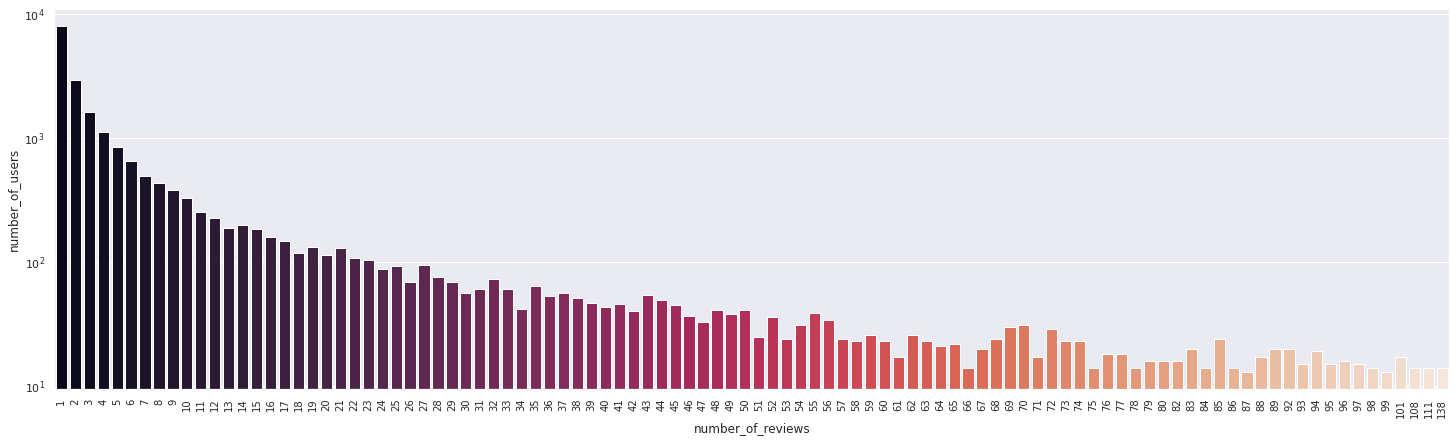

In [ ]:
#visualizing number of users with number of reviews

sns.set(rc={'figure.figsize':(25,7)})
ax = sns.barplot(x=reviews_count_user[0:100].number_of_reviews, y=reviews_count_user[0:200].number_of_users, palette="rocket")
ax.set(yscale="log")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,fontsize=10)
ax

There are few number of users who gave more reviews/ratings.

### **Data Exploration**

In [ ]:
beer_data.beer_beerid.nunique()

40304

In [ ]:
beer_data.review_profilename.nunique()

22497

In [ ]:
beer_data.review_overall.nunique()

10

In [ ]:
beer_data.review_overall.value_counts()

4.0    174527
4.5     97156
3.5     90725
3.0     49490
5.0     27115
2.5     17581
2.0     11601
1.5      3814
1.0      3289
0.0         6
Name: review_overall, dtype: int64

In [ ]:
beer_data.beer_beerid.count()

475304

**Removing the beer id's for which the number of ratings given are less than 30.**

**Removing the user id's who gave ratings less than 30.**

In [ ]:
beer_ids_no_of_ratings_grt_30 = reviews_count_beer_id.loc[reviews_count_beer_id.Reviews_count>=30].beer_beerid.to_frame('beer_beerid')
users_no_of_ratings_grt_30 = reviews_count_by_profilename.loc[reviews_count_by_profilename.count_reviews>=30].review_profilename.to_frame('review_profilename')

In [ ]:
rating = pd.merge(beer_data, beer_ids_no_of_ratings_grt_30, how='inner', on='beer_beerid')
rating = pd.merge(rating, users_no_of_ratings_grt_30, how='inner', on='review_profilename')

In [ ]:
rating.count()

beer_beerid           265348
review_profilename    265348
review_overall        265348
dtype: int64

In [ ]:
rating.groupby('beer_beerid').review_overall.mean()

beer_beerid
5        3.532609
6        3.707895
7        3.273649
9        3.344828
10       3.859116
           ...   
74827    3.942857
74904    3.925926
74986    4.228261
75013    4.120690
75086    3.664062
Name: review_overall, Length: 3130, dtype: float64

In [ ]:
rating.groupby('beer_beerid').review_overall.mean().mean()

3.7837973354284613

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


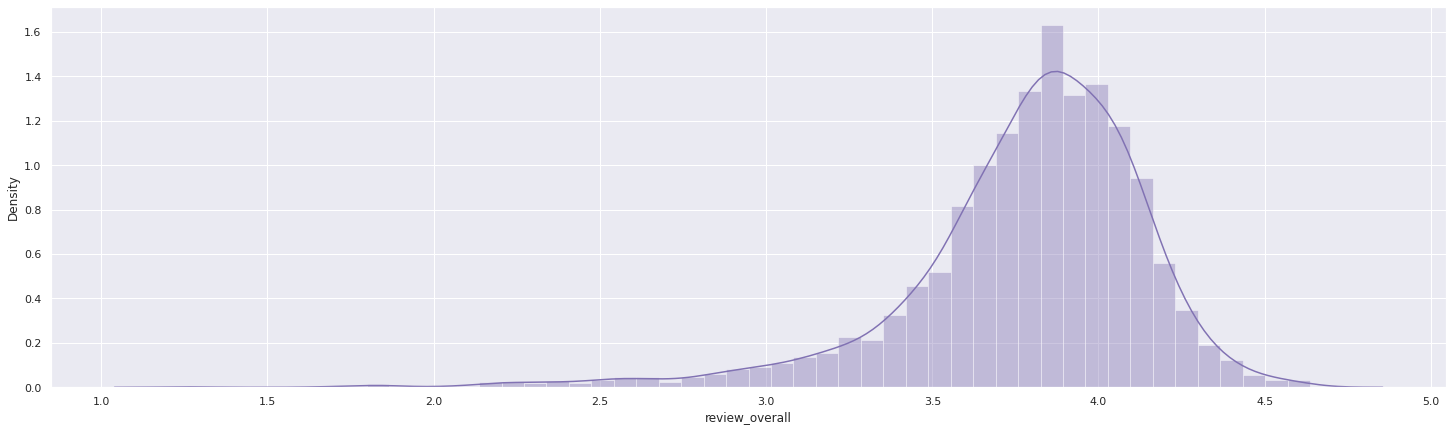

In [ ]:
sns.distplot(rating.groupby('beer_beerid').review_overall.mean(), color="m")

In [ ]:
rating.groupby('review_profilename').review_overall.mean()

review_profilename
0110x011       4.333333
05Harley       4.136364
100floods      4.069444
1759Girl       3.663043
1fastz28       3.850467
                 ...   
zoolzoo        3.652542
zoso1967       3.963504
zoso493        3.981132
zrab11         3.936508
zymurgy4all    3.750000
Name: review_overall, Length: 3176, dtype: float64

In [ ]:
rating.groupby('review_profilename').review_overall.mean().mean()

3.8607538534577253

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


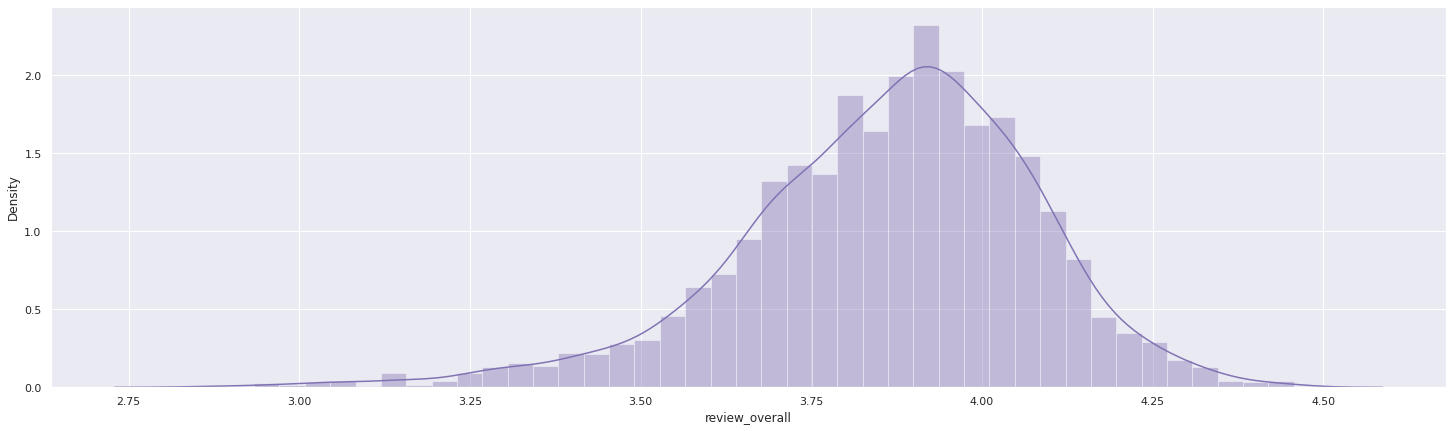

In [ ]:
sns.distplot(rating.groupby('review_profilename').review_overall.mean(), color="m")

In [ ]:
reviews_count_beer_id = rating.groupby('beer_beerid').review_overall.count().to_frame('Reviews_count').sort_values(by = "Reviews_count", ascending = False)

In [ ]:
reviews_count_beer_id.head()

,Reviews_count
beer_beerid,
2093,603
412,595
1904,575
1093,557
4083,531


In [ ]:
review_count_user = rating.groupby('review_profilename').review_overall.count().to_frame('Reviews_count').sort_values(by = "Reviews_count", ascending = False)

**BUILDING RECOMMENDATION SYSTEM USING TURICREATE LIBRARY**

In [ ]:
#Importing Libraries
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(rating, test_size=0.30, random_state=31)

In [ ]:
train.reset_index(inplace=True,drop=True)
test.reset_index(inplace=True,drop=True)

In [ ]:
train.head()

,beer_beerid,review_profilename,review_overall
0,56761,bort11,4.5
1,59,Treebs,4.0
2,818,DrJay,4.0
3,1149,beerthulhu,4.0
4,63,yesyouam,4.5


In [ ]:
pip install turicreate

     |████████████████████████████████| 92.0MB 47kB/s 
     |████████████████████████████████| 86.4MB 67kB/s 
     |████████████████████████████████| 3.4MB 44.7MB/s 
     |████████████████████████████████| 327kB 42.1MB/s 
     |████████████████████████████████| 450kB 43.6MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 3.8MB 37.5MB/s 
  Created wheel for resampy: filename=resampy-0.2.1-cp36-none-any.whl size=320847 sha256=0741e061085fc2f24e09f78653564653846387e0308442b71984ce993f868333
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
  Created wheel for prettytable: filename=prettytable-0.7.2-cp36-none-any.whl size=13700 sha256=d2c249ba98f919dab4eed3935fe1a784fcdd26ee071f270164f02b3ca85513ff
  Stored in directory: /root/.cache/pip/wheels/80/34/1c/3967380d9676d162cb59513bd9dc862d0584e045a162095606
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=c7

In [ ]:
#Importing neccessary libraries
import turicreate as tc

In [ ]:
#Converting to Sframe datatype
rating_data =  tc.SFrame(train)

In [ ]:
#Splitting training data to training & Validation data
training_data, validation_data = tc.recommender.util.random_split_by_user(rating_data, 'review_profilename', 'beer_beerid')

**BASIC RECOMMENDER MODEL**

There are a variety of machine learning techniques that can be used to build a recommender model. Turi Create provides a method turicreate.recommender.create that will automatically choose an appropriate model for the given data set.

In [ ]:
#Building basic recommender model
model = tc.recommender.create(training_data, 'review_profilename', 'beer_beerid')

Warning: Column 'review_overall' ignored.

To use one of these as a rating column, specify the column name to be used as target review_overall" and use a method that allows the use of a target.

Preparing data set.

Data has 173724 observations with 3176 users and 3130 items.

Data prepared in: 0.288601s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 3.389ms                        | 31.25      |

| 12.814ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 42.902ms                            | 0                | 2               |

| 527.968ms                           | 100              | 3130            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.55589s

**Making Recommendations using the model**

In [ ]:
results = model.recommend()

recommendations finished on 1000/3176 queries. users per second: 13314.7

recommendations finished on 2000/3176 queries. users per second: 14770.5

recommendations finished on 3000/3176 queries. users per second: 14818.9

In [ ]:
#Top 10 BeerID's recommended for each user
results

review_profilename,beer_beerid,score,rank
bort11,695,0.010373431608217572,1
bort11,6108,0.010164762308838171,2
bort11,1346,0.010067659780519819,3
bort11,276,0.009813409332835346,4
bort11,88,0.009803933287979266,5
bort11,30288,0.009759174027574171,6
bort11,2093,0.009218643017865102,7
bort11,102,0.008995275978648335,8
bort11,680,0.008833432963135046,9
bort11,1153,0.008819432980423673,10


In [ ]:
#Checking the beer id's recommended for specified user
recommendations = model.recommend(users=['DrJay'])

In [ ]:
recommendations

review_profilename,beer_beerid,score,rank
DrJay,1708,0.00679619272402228,1
DrJay,92,0.005597614444321416,2
DrJay,102,0.0055879580487105925,3
DrJay,141,0.005582341252649584,4
DrJay,2093,0.005531952726796657,5
DrJay,1118,0.005517597535285808,6
DrJay,1180,0.005266150577360813,7
DrJay,6108,0.005241307627312756,8
DrJay,1867,0.0052179078187198,9
DrJay,1153,0.005154243632320135,10


**Popularity based recommendation system**

In this system, beer id's are recommended based on the popularity of the item. Here, the recommendations are same to all the users. For example, it is recommending the top beers present in the dataset to all the users.

In [ ]:
popularity_model=tc.popularity_recommender.create(training_data,user_id='review_profilename',item_id='beer_beerid',target='review_overall')

Preparing data set.

Data has 173724 observations with 3176 users and 3130 items.

Data prepared in: 0.2227s

173724 observations to process; with 3130 unique items.

In [ ]:
#Return top K recommendations for users
popularity_recomm = popularity_model.recommend(k=5)
popularity_recomm.print_rows(num_rows=25)

recommendations finished on 1000/3176 queries. users per second: 25582

recommendations finished on 2000/3176 queries. users per second: 27536.8

recommendations finished on 3000/3176 queries. users per second: 28484.1

+--------------------+-------------+-------------------+------+
| review_profilename | beer_beerid |       score       | rank |
+--------------------+-------------+-------------------+------+
|       bort11       |    41928    |        4.68       |  1   |
|       bort11       |    36316    | 4.642857142857143 |  2   |
|       bort11       |    16814    |  4.62280701754386 |  3   |
|       bort11       |     1545    | 4.589473684210526 |  4   |
|       bort11       |    21690    | 4.588888888888889 |  5   |
|       Treebs       |    41928    |        4.68       |  1   |
|       Treebs       |    36316    | 4.642857142857143 |  2   |
|       Treebs       |     1545    | 4.589473684210526 |  3   |
|       Treebs       |    21690    | 4.588888888888889 |  4   |
|       Treebs       |    22173    | 4.586956521739131 |  5   |
|       DrJay        |    41928    |        4.68       |  1   |
|       DrJay        |    36316    | 4.642857142857143 |  2   |
|       DrJay        |    16814    |  4.

 **Similarity based models**

In this recommendation system, the beer id is recommended based on the degree of similarity between items.This model ranks an item according to its similarity to other items observed for the users.

In [ ]:
#Train Model
item_sim_model = tc.item_similarity_recommender.create(training_data,user_id='review_profilename',item_id='beer_beerid',target='review_overall', similarity_type='cosine')
#Make Recommendations:
item_sim_recomm = item_sim_model.recommend(k=5)
item_sim_recomm.print_rows(num_rows=25)

Preparing data set.

Data has 173724 observations with 3176 users and 3130 items.

Data prepared in: 0.231779s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 18.069ms                       | 31.25      |

| 25.358ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 60.605ms                            | 0                | 2               |

| 571.121ms                           | 100              | 3130            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.603801s

recommendations finished on 1000/3176 queries. users per second: 14841.4

recommendations finished on 2000/3176 queries. users per second: 15741.7

recommendations finished on 3000/3176 queries. users per second: 15702.4

+--------------------+-------------+----------------------+------+
| review_profilename | beer_beerid |        score         | rank |
+--------------------+-------------+----------------------+------+
|       bort11       |     2093    | 0.09877363312135048  |  1   |
|       bort11       |      88     | 0.09616678625071814  |  2   |
|       bort11       |     6108    |  0.0810000683189532  |  3   |
|       bort11       |     695     | 0.07869808061407246  |  4   |
|       bort11       |      92     | 0.07262841277166245  |  5   |
|       Treebs       |    11757    | 0.18780536311013357  |  1   |
|       Treebs       |    43217    | 0.14043461141132174  |  2   |
|       Treebs       |     7971    |  0.1302881950423831  |  3   |
|       Treebs       |    29619    | 0.11820619730722337  |  4   |
|       Treebs       |     6368    | 0.10746852556864421  |  5   |
|       DrJay        |     1708    | 0.059975760798472014 |  1   |
|       DrJay        |     2093    | 0.05908316307351492  |  2

**Evaluating Models**

In [ ]:
#Converting test data df to scalable frame
test_data =  tc.SFrame(test)

In [ ]:
#Evaluating the 3 models built
model.evaluate(test_data)
popularity_model.evaluate(test_data)
item_sim_model.evaluate(test_data)

recommendations finished on 1000/3175 queries. users per second: 12205.7

recommendations finished on 2000/3175 queries. users per second: 11981.7

recommendations finished on 3000/3175 queries. users per second: 11770.9


Precision and recall summary statistics by cutoff
+--------+---------------------+----------------------+
| cutoff |    mean_precision   |     mean_recall      |
+--------+---------------------+----------------------+
|   1    | 0.05291338582677167 | 0.003009018216868835 |
|   2    | 0.05653543307086615 | 0.006195502029990611 |
|   3    | 0.05501312335958011 | 0.008698929176139049 |
|   4    | 0.05716535433070866 | 0.011993822383760276 |
|   5    | 0.05700787401574804 | 0.01502137132764241  |
|   6    | 0.05690288713910767 | 0.017923740300676082 |
|   7    | 0.05732283464566913 | 0.021254448776595165 |
|   8    | 0.05732283464566927 | 0.02403350672706564  |
|   9    | 0.05634295713035888 | 0.026411043901285097 |
|   10   | 0.05606299212598422 | 0.029099514804674143 |
+--------+---------------------+----------------------+
[10 rows x 3 columns]



recommendations finished on 1000/3175 queries. users per second: 17752.8

recommendations finished on 2000/3175 queries. users per second: 17382.7

recommendations finished on 3000/3175 queries. users per second: 17749.8


Precision and recall summary statistics by cutoff
+--------+-----------------------+------------------------+
| cutoff |     mean_precision    |      mean_recall       |
+--------+-----------------------+------------------------+
|   1    | 0.0040944881889763765 | 0.00011909711729543674 |
|   2    |  0.003464566929133857 | 0.00021683762682792528 |
|   3    | 0.0052493438320209964 | 0.0006565706198136642  |
|   4    |  0.010472440944881901 |  0.002022419557271735  |
|   5    |  0.010078740157480306 | 0.0023528096810240765  |
|   6    |  0.009186351706036763 | 0.0025276025639706873  |
|   7    |  0.008908886389201325 |  0.002839999335904275  |
|   8    |  0.010078740157480314 | 0.0036083152167726883  |
|   9    |  0.012598425196850407 |  0.005202120428229986  |
|   10   |  0.012000000000000038 |  0.005467437893839453  |
+--------+-----------------------+------------------------+
[10 rows x 3 columns]


Overall RMSE: 0.5892171049888281

Per User RMSE (best)
+--------------------+--------

recommendations finished on 1000/3175 queries. users per second: 11191.9

recommendations finished on 2000/3175 queries. users per second: 11524.7

recommendations finished on 3000/3175 queries. users per second: 10906.8


Precision and recall summary statistics by cutoff
+--------+---------------------+----------------------+
| cutoff |    mean_precision   |     mean_recall      |
+--------+---------------------+----------------------+
|   1    | 0.06519685039370075 | 0.003811428316655748 |
|   2    | 0.06551181102362205 | 0.007345450103114716 |
|   3    | 0.06414698162729658 | 0.010778784504311311 |
|   4    | 0.06480314960629927 | 0.014155558524609443 |
|   5    | 0.06399999999999997 | 0.017122182293824763 |
|   6    | 0.06272965879265088 | 0.01989727880495041  |
|   7    | 0.06240719910011232 | 0.022758028746670163 |
|   8    |  0.0628740157480314 | 0.025792147821519226 |
|   9    | 0.06103237095363094 | 0.028294756440182995 |
|   10   | 0.05984251968503946 | 0.03076979158673956  |
+--------+---------------------+----------------------+
[10 rows x 3 columns]


Overall RMSE: 3.890847912852829

Per User RMSE (best)
+--------------------+-------------------+-------+
| review_profilename |        rmse  

{'precision_recall_by_user': Columns:
 	review_profilename	str
 	cutoff	int
 	precision	float
 	recall	float
 	count	int
 
 Rows: 57150
 
 Data:
 +--------------------+--------+--------------------+----------------------+-------+
 | review_profilename | cutoff |     precision      |        recall        | count |
 +--------------------+--------+--------------------+----------------------+-------+
 |       bort11       |   1    |        0.0         |         0.0          |   52  |
 |       bort11       |   2    |        0.0         |         0.0          |   52  |
 |       bort11       |   3    |        0.0         |         0.0          |   52  |
 |       bort11       |   4    |        0.0         |         0.0          |   52  |
 |       bort11       |   5    |        0.0         |         0.0          |   52  |
 |       bort11       |   6    |        0.0         |         0.0          |   52  |
 |       bort11       |   7    |        0.0         |         0.0          |   52  |
 |   

**MODEL PERFORMANCE**

In [ ]:
model_performance = tc.recommender.util.compare_models=(rating_data,[model,popularity_model, item_sim_model])
print (model_performance)

(Columns:
	beer_beerid	int
	review_profilename	str
	review_overall	float

Rows: 185743

Data:
+-------------+--------------------+----------------+
| beer_beerid | review_profilename | review_overall |
+-------------+--------------------+----------------+
|    56761    |       bort11       |      4.5       |
|      59     |       Treebs       |      4.0       |
|     818     |       DrJay        |      4.0       |
|     1149    |     beerthulhu     |      4.0       |
|      63     |      yesyouam      |      4.5       |
|     2904    |      jcalabre      |      3.0       |
|      74     |      becktone      |      3.5       |
|    43335    |       WesWes       |      4.5       |
|    25231    |   AKBelgianBeast   |      5.0       |
|     402     |     Dodo2step      |      3.5       |
+-------------+--------------------+----------------+
[185743 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and colum

**REFERENCES**

https://medium.com/towards-artificial-intelligence/recommendation-systems-104bdfe3f93f
https://www.programmersought.com/article/53685557386/